# Collision Severity Predicton: A Case study of Seattle

![alt text](https://static.seattletimes.com/wp-content/uploads/2015/11/8c66ca0c-92c6-11e5-85b7-9f2fa60d7623-780x559.jpg "Seattle")

## 1. Introduction

<div style="text-align: justify">Road accidents are an important issue of our modern societies, responsible for millions of deaths and injuries every year in the world. Seattle, a city on Puget Sound in the Pacific Northwest., Washington State’s largest city, is a home to a large tech industry, with Microsoft and Amazon headquartered in its metropolitan area. The city is of high socio-economic value and is rapidly changing with time. The rapid economic growth that the city has developed in the past has resulted in improving the lifestyle of the people living over there. With the raised standard of living in the city, and greater purchasing power of its inhabitants, the number of automobiles on the roads has increased rapidly. With so many people owning and operating vehicles on the roads, problems like traffic jams, congestion on roads, and road accidents are becoming a common sight. Now, wouldn't it be great if there is something in place that could warn the road users, given the weather and the road conditions about the possibility of them getting into a car accident and how severe it would be, so that they would drive more carefully or even change their travel if they are able to? Well, this is exactly what this project addresses. The data for this work was taken from open data platform hosted by the city of Seattle found <a href= https://data.seattle.gov/Land-Base/Collisions/9kas-rb8d>here</a>. This includes all types of collisions from 2004 to Present. This data is updated weekly, so the presented analysis is based on the data collected at that time (Wednesday, 07 October 2020). This dataset also provides information regarding the cause and type of the collisions.</div>

## 2. Data

In this section, we will be importing the dataset, exploring it and understanding it to select relevant data with the appropriate features as per the needs and wants of the problem.

Firstly, importing some important python libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt


Now importing the data set from the remote source are taking a perfunctory look at it:

In [2]:
df= pd.read_csv("http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv?outSR=%7B%22latestWkid%22%3A2926%2C%22wkid%22%3A2926%7D")
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1.268354e+06,265256.609668,1,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,...,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N
1,1.259316e+06,202173.388163,2,56200,56200,1795087,Matched,Block,NaN,35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,...,Dry,Dark - Street Lights On,NaN,6015003.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
2,1.264342e+06,259613.000382,3,327037,328537,E979380,Matched,Intersection,37122.0,3RD AVE NW AND NW 100TH ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,1.279221e+06,222017.872023,4,327278,328778,E996362,Unmatched,Intersection,30602.0,M L KING JR WAY S AND S JACKSON ST,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,1.262205e+06,242179.124204,5,1248,1248,3645424,Unmatched,Block,NaN,W EWING ST BETWEEN 6TH AVE W AND W EWING PL,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [3]:
df.size

8861000

In [4]:
df.shape

(221525, 40)

In [5]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

So there are 40 columns with different names. The description of these names can be found <a href= https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf>here</a>. A brief summary of the dataframe along with the datatype of the columns can be found below.

Let us rename these column names to make it more convenient for 

In [6]:
df.rename(columns={'SEVERITYCODE': 'severity_code', 'X':'longitude', 'Y': 'latitude',
                   'ADDRTYPE':'addr_type', 'LOCATION': 'location','SEVERITYDESC':'severity_desc', 'COLLISIONTYPE':'collision_type',
                   'PERSONCOUNT':'person_count', 'PEDCOUNT': 'ped_count', 'PEDCYLCOUNT': 'ped_cycle_count', 'VEHCOUNT': 'veh_count',
                   'INCDTTM': 'incident_date&time', 'JUNCTIONTYPE': 'junc_type', 'SDOT_COLCODE': 'case_code', 'SDOT_COLDESC': 'case_desc',
                   'UNDERINFL':'under_infl', 'WEATHER': 'weather', 'ROADCOND': 'roadcond', 'LIGHTCOND': 'light_cond',
                   'ST_COLCODE': 'st_code', 'ST_COLDESC': 'st_desc', 'HITPARKEDCAR':'hit_parked_car', 'SPEEDING':'speeding', 
                   'FATALITIES':'fatalities', 'INJURIES':'injuries', 'SERIOUSINJURIES':'serious_injuries', 'INCDATE':'incident_date', 
                   'INATTENTIONIND':'inattention_involved', 'PEDROWNOTGRNT':'ped_row_not_granted', 'SDOTCOLNUM':'sdot_collision_num'}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221525 entries, 0 to 221524
Data columns (total 40 columns):
longitude               214050 non-null float64
latitude                214050 non-null float64
OBJECTID                221525 non-null int64
INCKEY                  221525 non-null int64
COLDETKEY               221525 non-null int64
REPORTNO                221525 non-null object
STATUS                  221525 non-null object
addr_type               217813 non-null object
INTKEY                  71936 non-null float64
location                216935 non-null object
EXCEPTRSNCODE           101122 non-null object
EXCEPTRSNDESC           11779 non-null object
severity_code           221524 non-null object
severity_desc           221525 non-null object
collision_type          195212 non-null object
person_count            221525 non-null int64
ped_count               221525 non-null int64
ped_cycle_count         221525 non-null int64
veh_count               221525 non-null int64
in

Now that we have acquired the data, let us try to comprehend it to get some idea on which attributes or features should be selected for the modelling.

## 3. Data Understanding

The aim of this work is to predict the severity of a car accident based on various attributes. The columns 'severity_code and 'severity_desc' depict the code that corresponds to the level of severity as classified by SDOT and the description of the severity of the collision respectively. Let us have a look at the data distribution according to the severity of the incident.

### Collision Severity

In [8]:
df.groupby(['severity_code', 'severity_desc']).size().to_frame('counts')

,,counts
severity_code,severity_desc,
0,Unknown,21615
1,Property Damage Only Collision,137671
2,Injury Collision,58783
2b,Serious Injury Collision,3105
3,Fatality Collision,350


The severity codes are a little confusing because of alphanumeric label 2b. Let us replace 2b with 3 and 3 with 4 in the severity_code column.

In [9]:
df['severity_code'].replace(to_replace={'3':'4', '2b': '3'}, inplace=True)
df['severity_code'].value_counts().to_frame('Counts')

,Counts
1,137671
2,58783
0,21615
3,3105
4,350


We can see that majority of collisions are non-fatal in nature, with most collisions only leading to property damage an injuries. Now, let us have a look at the various collision types recorded in the dataset.

### Collision Type

In [10]:
df['collision_type'].value_counts().to_frame('Counts').sort_values(by='Counts',ascending=False)

,Counts
Parked Car,48551
Angles,35573
Rear Ended,34691
Other,24588
Sideswipe,18891
Left Turn,14115
Pedestrian,7666
Cycles,5932
Right Turn,3017
Head On,2188


We see that collision with parked cars was the most frequent collision type while head on Collisions were the least common. These collisions happened at different locations as shown in the following section.

### Collision Address type and Junction Type

In [11]:
df.groupby(['addr_type', 'junc_type']).size().to_frame('Counts')

Counts
addr_type    junc_type                                                
Alley        At Intersection (but not related to intersection)       1
             Driveway Junction                                      66
             Mid-Block (not related to intersection)               195
Block        At Intersection (but not related to intersection)       1
             At Intersection (intersection related)                  4
             Driveway Junction                                   11426
             Mid-Block (but intersection related)                24388
             Mid-Block (not related to intersection)            100976
             Ramp Junction                                         153
             Unknown                                                12
Intersection At Intersection (but not related to intersection)    2491
             At Intersection (intersection related)              69189
             Mid-Block (but intersection related)                    1
             Mid-Block (not related to intersection)                15
             Ramp Junction                                          35
             Unknown                                                 6

We see that most collisions occured at the Blocks and Intersections. This may be due to the fact that these locations are the points where traffic merges and therefore are much prone to conflicts. Now let us see the description of the weather conditions during the time of the collision. 

### Weather

In [12]:
df['weather'].value_counts().to_frame('Counts')

,Counts
Clear,114738
Raining,34036
Overcast,28552
Unknown,15131
Snowing,919
Other,860
Fog/Smog/Smoke,577
Sleet/Hail/Freezing Rain,116
Blowing Sand/Dirt,56
Severe Crosswind,26


We find that most collisions occur during clear weather condition followed by raining and overcast conditions. This might be because the drivers tend to avoid driving when the weather condition is worse. Next, let us see the road conditons at the spot of collisions.

### Road Condition

In [13]:
df['roadcond'].value_counts().to_frame('Counts')

,Counts
Dry,128588
Wet,48734
Unknown,15139
Ice,1232
Snow/Slush,1014
Other,136
Standing Water,119
Sand/Mud/Dirt,77
Oil,64


Most collisions seem to have happened on dry and wet roads. 

### Light Condition

We can see the light conditions during the collision in the table below. 

In [14]:
df['light_cond'].value_counts().to_frame('counts')

,counts
Daylight,119492
Dark - Street Lights On,50133
Unknown,13532
Dusk,6082
Dawn,2609
Dark - No Street Lights,1579
Dark - Street Lights Off,1239
Other,244
Dark - Unknown Lighting,23


So most collisions occurred during good lighting conditions during daytime and at night with street lights on. Another factor that can cause accidents is the condition of the road user being intoxicated i.e. under the influence of alcohol and drugs. The next section shows the distibution of whether the driver involved was under the influence of drugs or alcohol.  

### Under the Influence of alcohol/drugs

In [15]:
df['under_infl'].value_counts().to_frame('counts')

,counts
N,103927
0,81676
Y,5399
1,4230


We see that this column has different entries used, which are just the duplicate of themselves .Hence changing them to a unique numeric data which will be good for processing the data. 

In [16]:
df['under_infl'].replace(to_replace={'Y':1, 'N':0, '1':1, '0':0}, inplace=True)
df['under_infl'].value_counts().to_frame('counts')

,counts
0.0,185603
1.0,9629


So we can see that in most cases people were not intoxicated. Now let us have a look at the distribution of various road users involved in these collisions.

### Collisions by Road User

In [17]:
df[['person_count', 'ped_count', 'ped_cycle_count', 'veh_count']].describe()

,person_count,ped_count,ped_cycle_count,veh_count
count,221525.000000,221525.000000,221525.000000,221525.000000
mean,2.226941,0.038118,0.027360,1.730482
std,1.470050,0.201766,0.164537,0.829754
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,0.000000,2.000000
75%,3.000000,0.000000,0.000000,2.000000
max,93.000000,6.000000,2.000000,15.000000


We see that mostly vehicle owners were involved in these accidents, with an average of 2.23 people and 1.73 vehicle involved in each collision. Now let us move to the Data Cleaning and Preprocessing stage.


## 2. Data Cleaning & Preprocessing

The first step in this would be to take care of the missing or Nan values in the dataframe. If Nan values are present, we would either delete the entire row/column or replace the null value to some other suitable value, depending on the requirement. Let us find ut how many null values are present in each column.

In [18]:
df.isnull().sum()

longitude                 7475
latitude                  7475
OBJECTID                     0
INCKEY                       0
COLDETKEY                    0
REPORTNO                     0
STATUS                       0
addr_type                 3712
INTKEY                  149589
location                  4590
EXCEPTRSNCODE           120403
EXCEPTRSNDESC           209746
severity_code                1
severity_desc                0
collision_type           26313
person_count                 0
ped_count                    0
ped_cycle_count              0
veh_count                    0
injuries                     0
serious_injuries             0
fatalities                   0
incident_date                0
incident_date&time           0
junc_type                11974
case_code                    1
case_desc                    1
inattention_involved    191337
under_infl               26293
weather                  26503
roadcond                 26422
light_cond               26592
ped_row_

STATUS, INTKEY,OBJECTID, INCKEY, COLDETKEY, REPORTNO, EXCEPTRSNCODE, EXCEPTRSNDESC, incident_date, inattention_involved, ped_row_not_granted, sdot_collision_num, SEGLANEKEY, CROSSWALKKEY, addr_type, location, st_code, st_desc, case_code, case_desc has a lot of missing values and they are not useful and irrelevant for this dataset. So they are dropped.

In [19]:
df.drop(['STATUS', 'INTKEY', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'incident_date', 'inattention_involved', 'ped_row_not_granted', 'sdot_collision_num', 'SEGLANEKEY', 'CROSSWALKKEY', 'addr_type', 'location', 'st_code', 'st_desc', 'case_code', 'case_desc'], axis=1, inplace=True)

In [20]:
df.shape

(221525, 20)

In [21]:
df.isnull().sum()

longitude               7475
latitude                7475
severity_code              1
severity_desc              0
collision_type         26313
person_count               0
ped_count                  0
ped_cycle_count            0
veh_count                  0
injuries                   0
serious_injuries           0
fatalities                 0
incident_date&time         0
junc_type              11974
under_infl             26293
weather                26503
roadcond               26422
light_cond             26592
speeding              211596
hit_parked_car             0
dtype: int64

The speeding column has a lot of missing values and consists of only 'y' in cases that involved speeding. So, converting Y->1 and nan->0 to make the speeding column consistent and get rid of all Nan values.

In [22]:
df['speeding'].replace(to_replace={'Y':1, np.nan:0, '1':1, '0':0}, inplace=True)
df['speeding'].value_counts().to_frame('counts')

,counts
0,211596
1,9929


The dataset has some columns with useless data like unknown and others which won't fall under any of the category and they are a kind of outliers which ruin the dataset .Hence they are all converted to nan, thereby, paving way to group them under the category of missing values.

In [23]:
df.replace(to_replace={'Unknown':np.nan, 'Other':np.nan}, inplace=True)

Now dropping all rows with missing data in the dataset.

In [24]:
df.dropna(axis=0, inplace=True)

In [25]:
df.shape

(148112, 20)

In [26]:
df.isnull().sum()

longitude             0
latitude              0
severity_code         0
severity_desc         0
collision_type        0
person_count          0
ped_count             0
ped_cycle_count       0
veh_count             0
injuries              0
serious_injuries      0
fatalities            0
incident_date&time    0
junc_type             0
under_infl            0
weather               0
roadcond              0
light_cond            0
speeding              0
hit_parked_car        0
dtype: int64

So, as we can see, we are only left with 20 columns in our dataset, with each column being devoid of missing values. Let us now extract year, month, weekday and time details from 'incident_date&time' column.

In [27]:
# Convert incident_date&time to date type.
df['incident_date&time'] = pd.to_datetime(df['incident_date&time'], errors='coerce')

# Extract month, weekday, hour information
df['Year']=df['incident_date&time'].dt.year
df['Month']=df['incident_date&time'].dt.month
df['Weekday']=df['incident_date&time'].dt.weekday
df['Hour']=df['incident_date&time'].dt.hour

In [28]:
# Dropping the incident_date&time colum now:
df.drop('incident_date&time', axis =1, inplace= True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148112 entries, 0 to 221523
Data columns (total 23 columns):
longitude           148112 non-null float64
latitude            148112 non-null float64
severity_code       148112 non-null object
severity_desc       148112 non-null object
collision_type      148112 non-null object
person_count        148112 non-null int64
ped_count           148112 non-null int64
ped_cycle_count     148112 non-null int64
veh_count           148112 non-null int64
injuries            148112 non-null int64
serious_injuries    148112 non-null int64
fatalities          148112 non-null int64
junc_type           148112 non-null object
under_infl          148112 non-null float64
weather             148112 non-null object
roadcond            148112 non-null object
light_cond          148112 non-null object
speeding            148112 non-null int64
hit_parked_car      148112 non-null object
Year                148112 non-null int64
Month               148112 non-null

This concludes the data cleaning part of our work. Now let us begin exploratory data analysis before we move to modelling.

## 5. Exploratory Data Analysis

We will start by visualizing the distribution of accident severity.

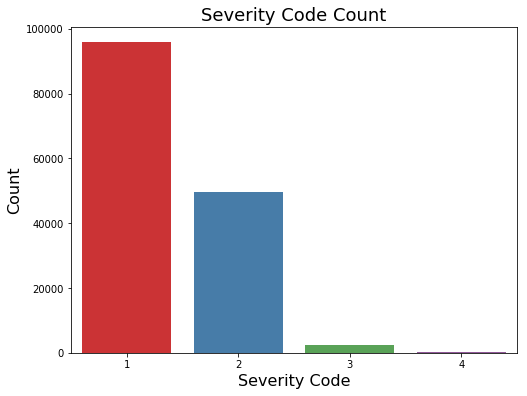

In [30]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x ='severity_code', palette='Set1', data = df) 
plt.title('Severity Code Count', fontsize=18)
plt.xlabel('Severity Code', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

Again we see that most accidents cause only property damage or minor injuries. Next, let us see the trend of collisions on roads through the years.


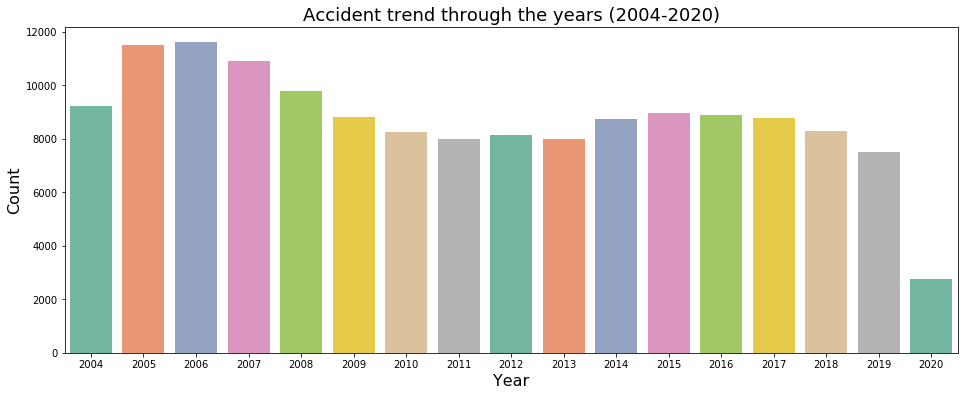

In [31]:
plt.figure(figsize=(16,6))
sns.countplot(x ='Year', palette='Set2', data = df) 
plt.title('Accident trend through the years (2004-2020)', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

So we can see that the number of road accidents have somewhat decreased over the last decade which is a good sign. The data for the year 2020 is incomplete and should not be seen in comparison with previus years. Next let us have a look at the accident trends through the Months. 

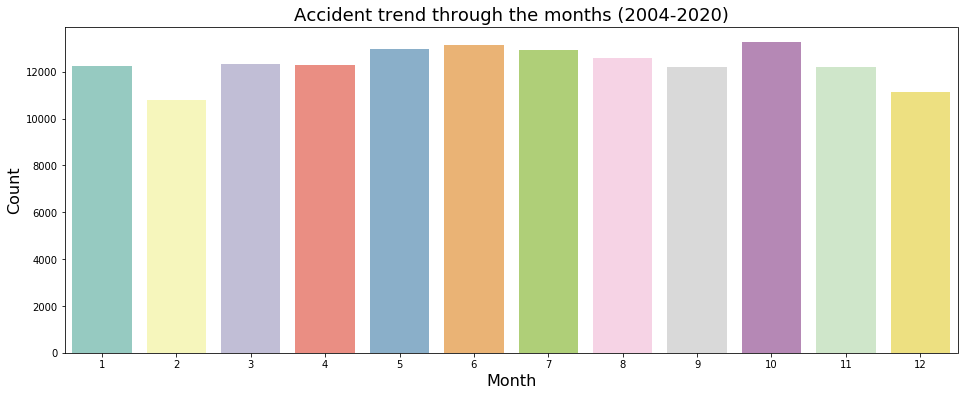

In [32]:
plt.figure(figsize=(16,6))
sns.countplot(x ='Month', palette='Set3', data = df) 
plt.title('Accident trend through the months (2004-2020)', fontsize=18)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

There is no clear trend in number of collisions and month of the year. How about the collision trend through the weekdays? 

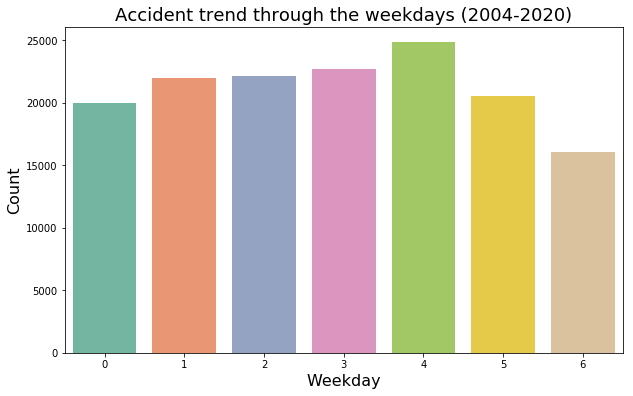

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x ='Weekday', palette='Set2', data = df) 
plt.title('Accident trend through the weekdays (2004-2020)', fontsize=18)
plt.xlabel('Weekday', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

In the plot above weekday 0 corresponds to Monday and so on. We see that the number of accidents peak on friday then start decreasing again. Now let us have a look at the hourly distribution of collisions in a day. But before that let us divide the day into different times such as morning, noon, night etc.

In [34]:
bins = [0,4,8,12,16,20,24]
labels = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df['Time'] = pd.cut(df['Hour'], bins=bins, labels=labels, include_lowest=True)
df[['Time', 'Hour']].sample(5)

,Time,Hour
161380,Night,22
145744,Early Morning,8
78266,Morning,9
218917,Night,21
218878,Morning,12


In [35]:
df.drop('Hour', axis=1, inplace=True) #Dropping Hour column as it is no longer needed

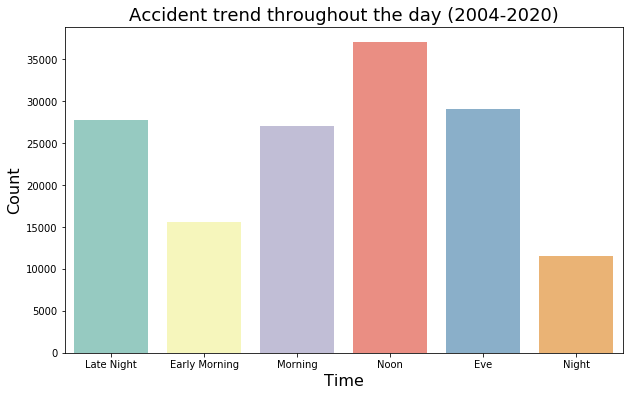

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x ='Time', palette='Set3', data = df) 
plt.title('Accident trend throughout the day (2004-2020)', fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

We can see that most accidents happen at noon followed by evening and late night repectively. Let us also see how the severity of accidents vary through different times of the day.

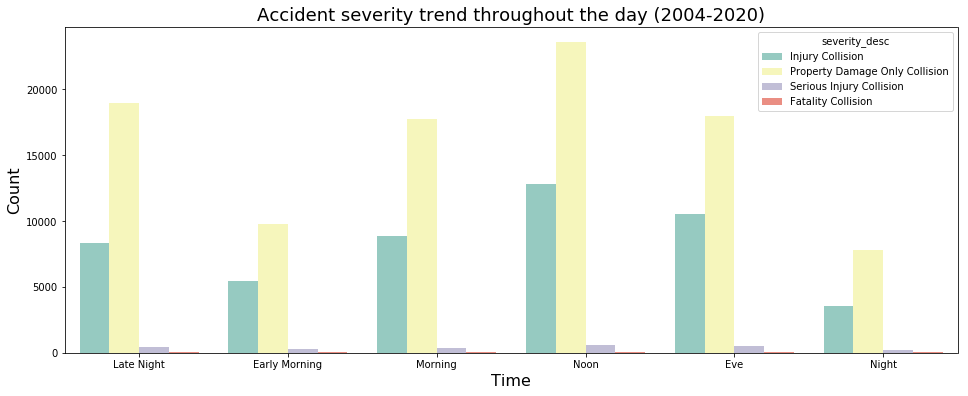

In [37]:
plt.figure(figsize=(16,6))
sns.countplot(x ='Time', palette='Set3', hue= 'severity_desc', data = df) 
plt.title('Accident severity trend throughout the day (2004-2020)', fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

In [38]:
pd.crosstab(df.Time, df.severity_code)

severity_code,1,2,3,4
Time,,,,
Late Night,18941,8323,477,55
Early Morning,9796,5438,282,30
Morning,17778,8892,359,33
Noon,23574,12838,568,53
Eve,17988,10520,543,45
Night,7802,3534,219,24


We see that most fatal accidents happen at late might and noon, but we cannot establish anything concrete from this distribution. Next, let us look at the distribution of collision type.

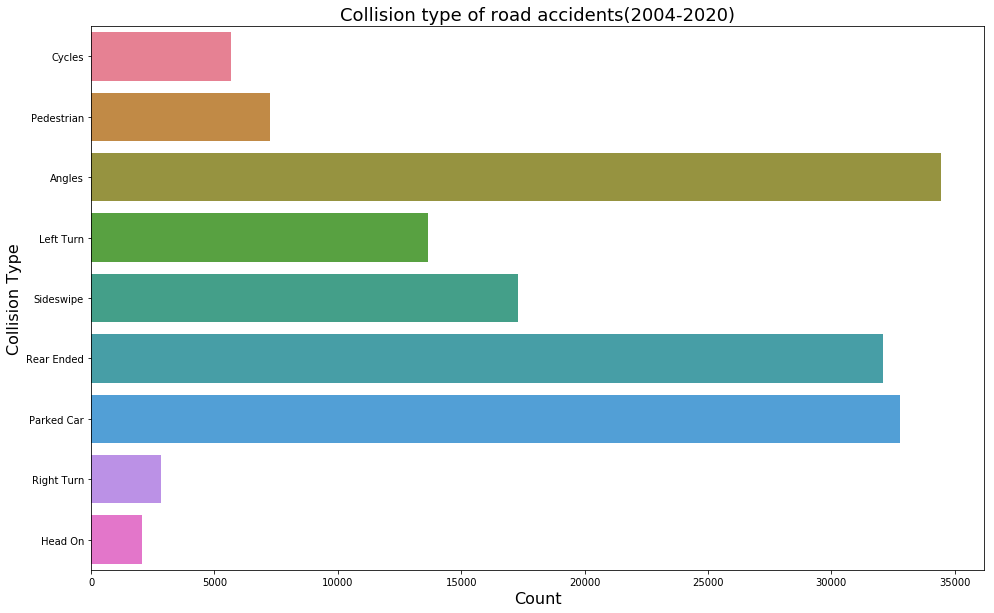

In [39]:
plt.figure(figsize=(16,10))
sns.countplot(y ='collision_type', palette='husl', data = df) 
plt.title('Collision type of road accidents(2004-2020)', fontsize=18)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Collision Type', fontsize=16)
plt.show()

We see that most accidents are angled crashes followed by parked car and rear end crashes. Let us see the severity distribution of these collision types.

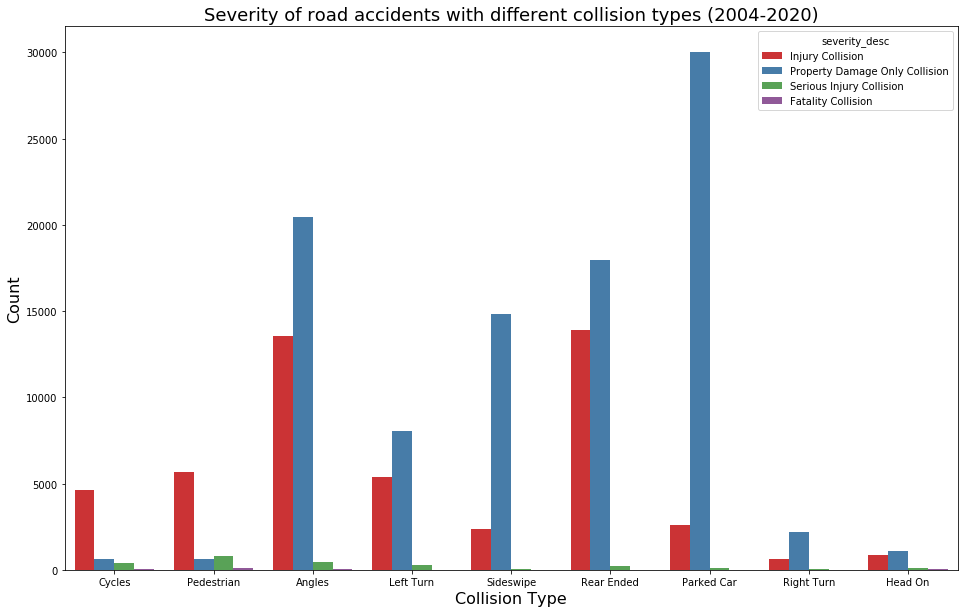

In [40]:
plt.figure(figsize=(16,10))

sns.countplot(hue ='severity_desc', palette='Set1', x= 'collision_type', data = df) 
plt.title('Severity of road accidents with different collision types (2004-2020)', fontsize=18)
plt.xlabel('Collision Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

As expected, we can see that most property damage only collisions are caused by parked car collisions. And most serious injuries and fatalities are caused by collisions with pedestrians. As such special attantion should be paid towards pedestrian safety. We can also see the collision distribution as per junction type.

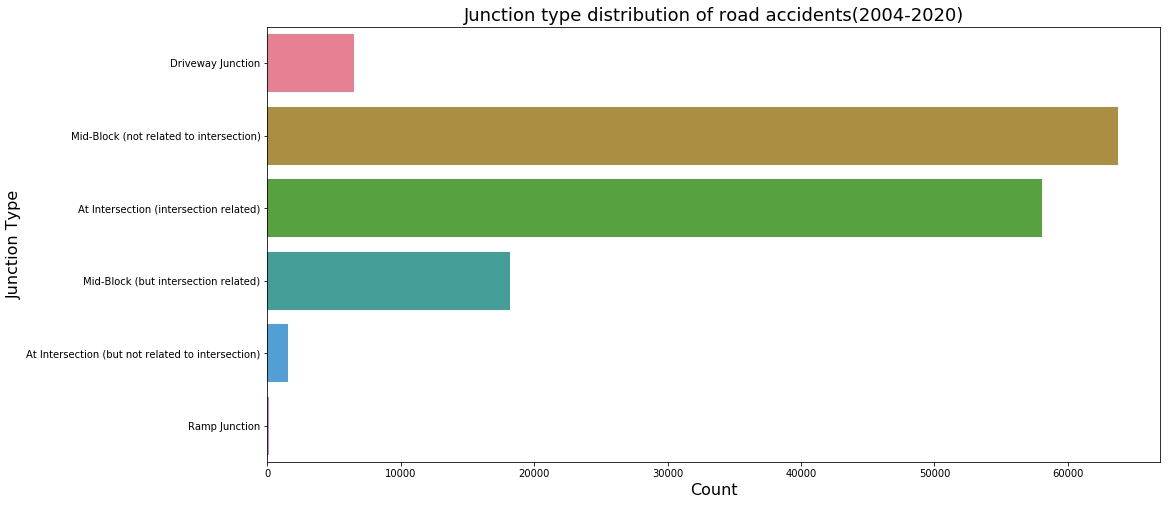

In [41]:
plt.figure(figsize=(16,8))
sns.countplot(y ='junc_type', palette='husl', data = df) 
plt.title('Junction type distribution of road accidents(2004-2020)', fontsize=18)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Junction Type', fontsize=16)
plt.show()

We fins that most collisions occur at midblock and intersections as expected, given that they are points where the traffic merges. Now let us see the severity distribution of collisions at these locations.

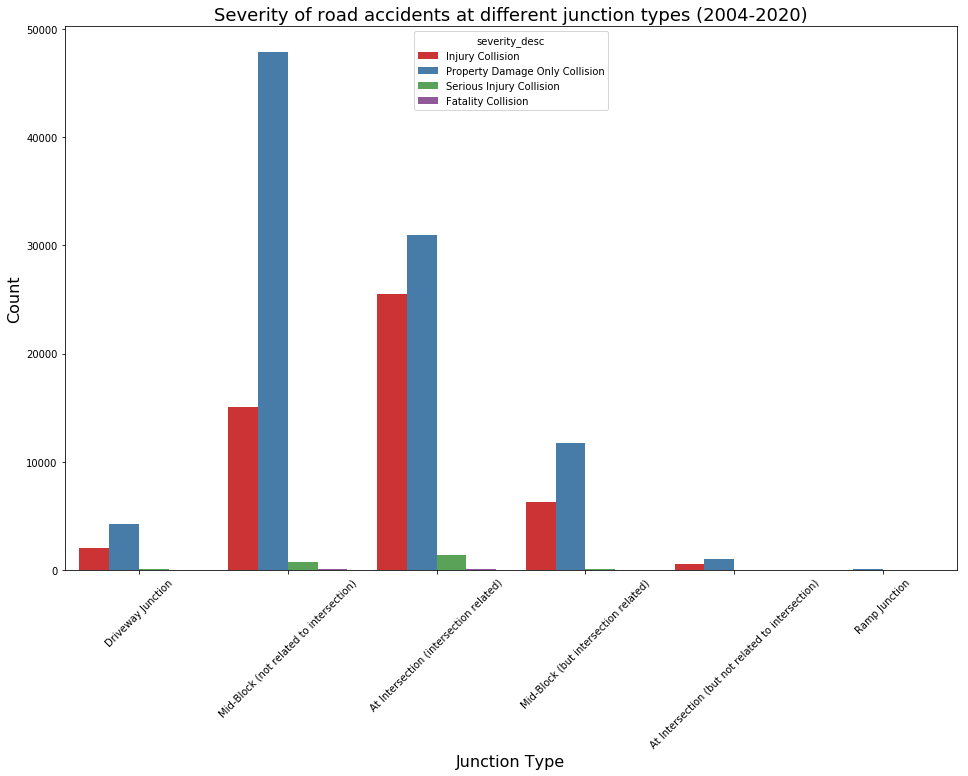

In [42]:
plt.figure(figsize=(16,10))

sns.countplot(hue ='severity_desc', palette='Set1', x= 'junc_type', data = df) 
plt.title('Severity of road accidents at different junction types (2004-2020)', fontsize=18)
plt.xlabel('Junction Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation= 45)
plt.show()

We find that most property damage only collisions occur at midblocks while most injury collisions happen at intersections. Now let us see how weather, road conditions and light conditions affect collision count. 

Text(0, 0.5, 'Light Condition')

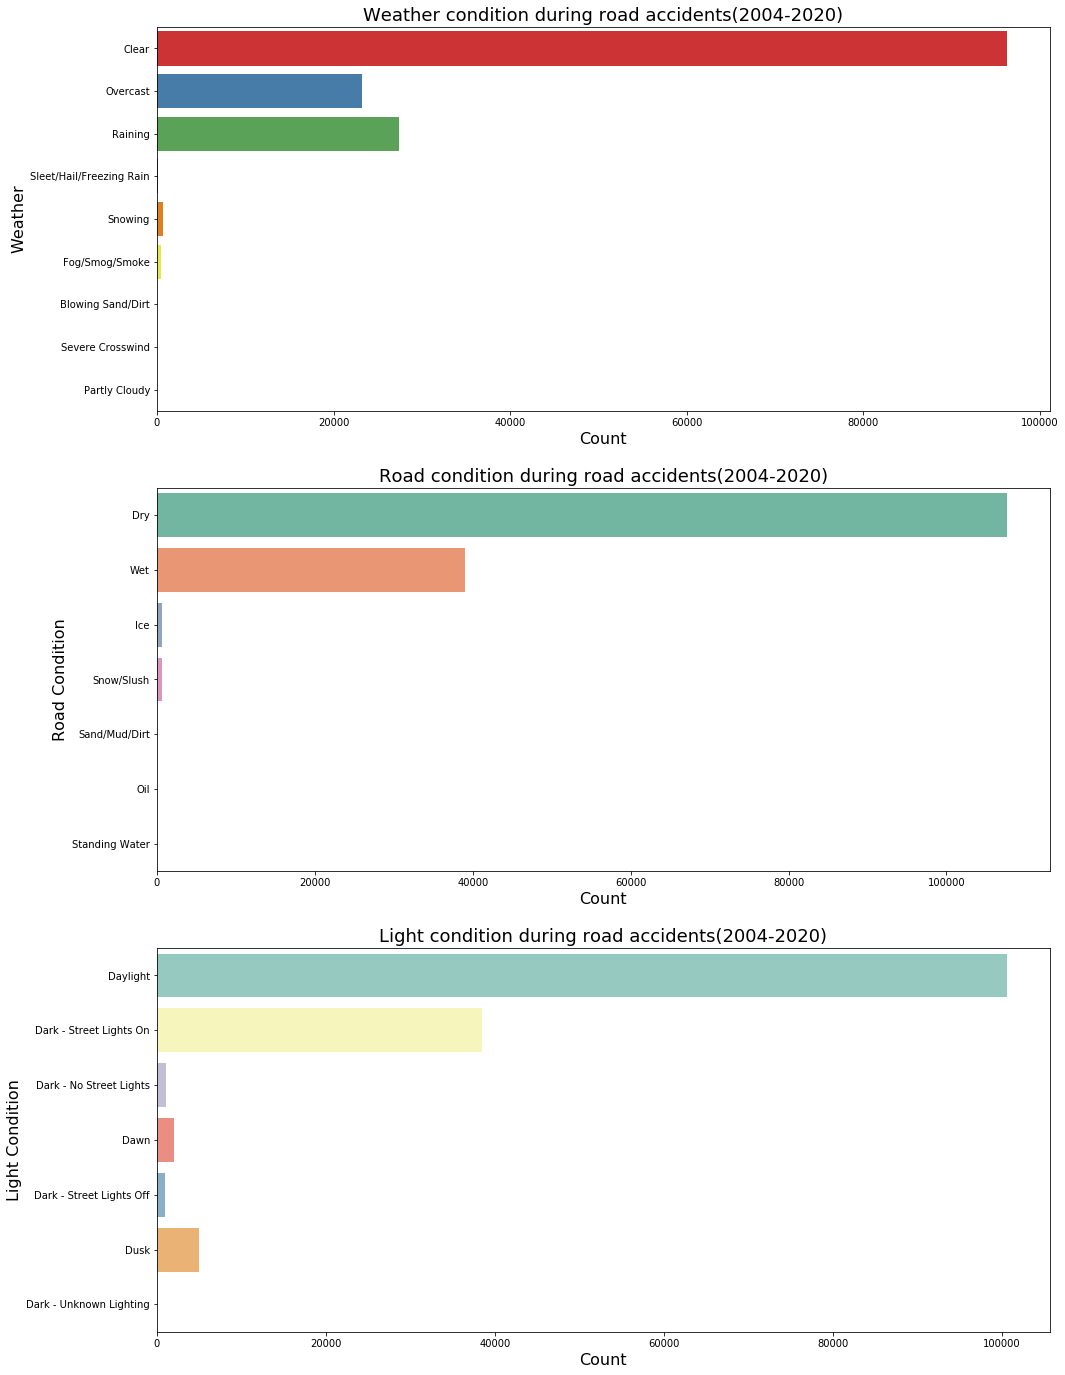

In [43]:
fig= plt.figure(figsize=(16,24))
ax1= fig.add_subplot(3,1,1)
ax2= fig.add_subplot(3,1,2)
ax3= fig.add_subplot(3,1,3)
sns.countplot(y ='weather', palette='Set1', data = df, ax=ax1) 
sns.countplot(y ='roadcond', palette='Set2', data = df, ax=ax2) 
sns.countplot(y ='light_cond', palette='Set3', data = df, ax=ax3) 
ax1.set_title('Weather condition during road accidents(2004-2020)', fontsize=18)
ax1.set_xlabel('Count', fontsize=16)
ax1.set_ylabel('Weather', fontsize=16)
ax2.set_title('Road condition during road accidents(2004-2020)', fontsize=18)
ax2.set_xlabel('Count', fontsize=16)
ax2.set_ylabel('Road Condition', fontsize=16)
ax3.set_title('Light condition during road accidents(2004-2020)', fontsize=18)
ax3.set_xlabel('Count', fontsize=16)
ax3.set_ylabel('Light Condition', fontsize=16)

Unexpectedly, most collisions happened during clear days on dry roads in daylight. This might be because of greater traffic volume during the day time and clear weather.

Now let us see how many accidents happened under the influence of alcohol/drugs and the severity of these accidents.

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "upperright". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


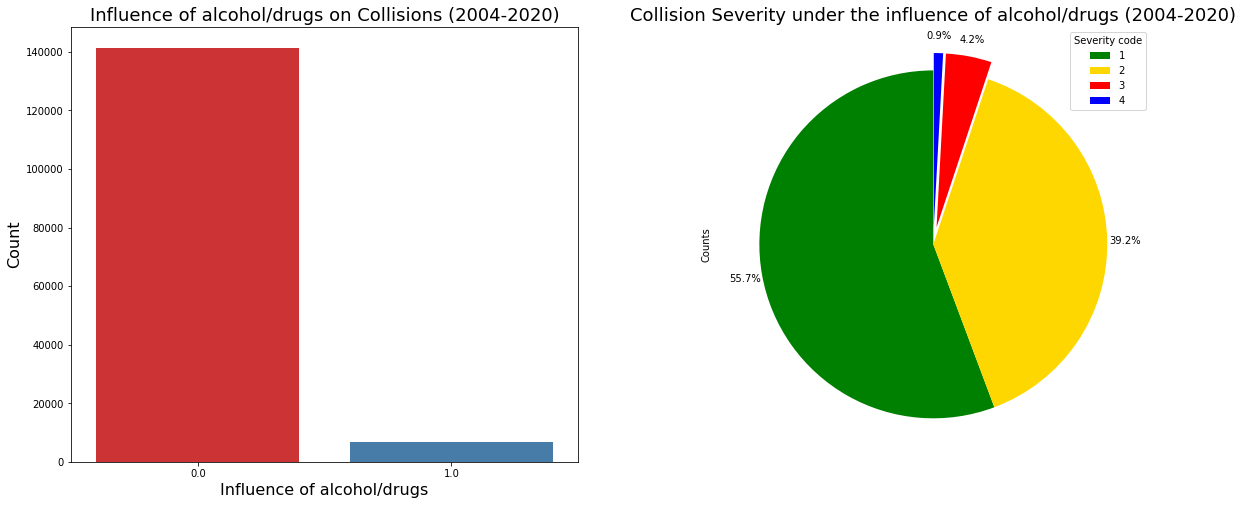

In [44]:
fig= plt.figure(figsize=(20,8))
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

sns.countplot(x ='under_infl', palette='Set1', data = df, ax=ax1) 
color_list= ['green', 'gold', 'red', 'blue']
explode_list=[0, 0, 0.1, 0.1]
df[df.under_infl==1].groupby('severity_code').size().to_frame('Counts').Counts.plot(kind='pie', autopct= '%1.1f%%', startangle= 90, shadow= False, 
                                                                pctdistance =1.1, colors= color_list, explode=explode_list, labels=None, ax=ax2)
 

ax1.set_title('Influence of alcohol/drugs on Collisions (2004-2020)', fontsize=18)
ax1.set_xlabel('Influence of alcohol/drugs', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)

ax2.set_title('Collision Severity under the influence of alcohol/drugs (2004-2020)', fontsize=18)
ax2.legend(title= 'Severity code',labels= df[df.under_infl==1].groupby('severity_code').size().to_frame().index, loc= 'upperright')

We see that in the majority of the collisions that occur, the drivers where not under the influence of alcohol/drugs. Among those that do, 44.3% collisions lead to injuries with some even serious or fatal. Now let us see how speeding affects the collision count and severity. 

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "upperright". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


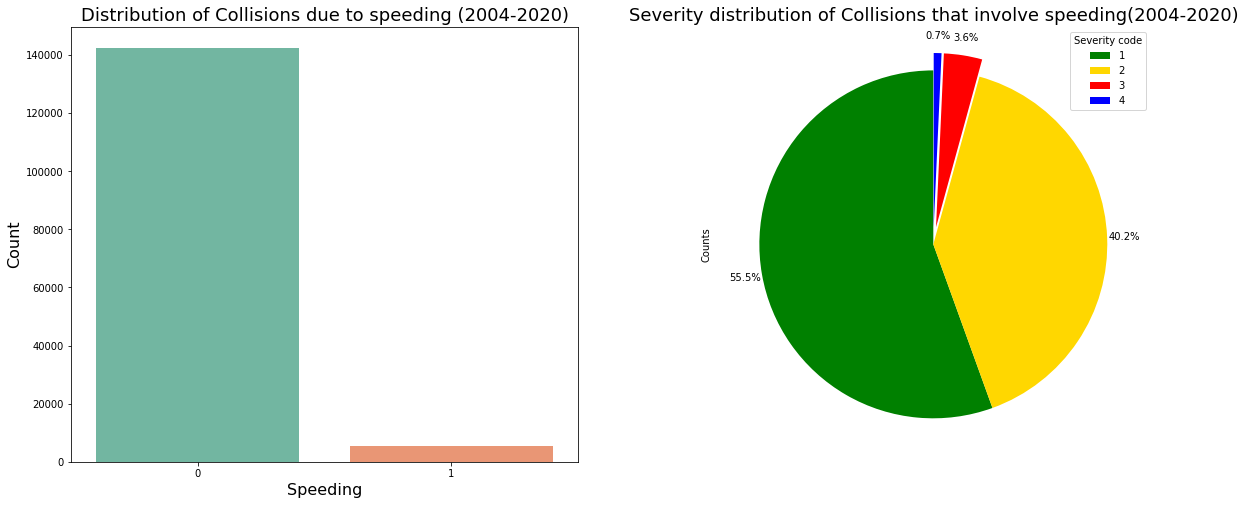

In [45]:
fig= plt.figure(figsize=(20,8))
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

sns.countplot(x ='speeding', palette='Set2', data = df, ax=ax1) 

color_list= ['green', 'gold', 'red', 'blue']
explode_list=[0, 0, 0.1, 0.1]
df[df.speeding==1].groupby('severity_code').size().to_frame('Counts').Counts.plot(kind='pie', autopct= '%1.1f%%', startangle= 90, shadow= False, 
                                                                pctdistance =1.1, colors= color_list, explode=explode_list, labels=None, ax=ax2)
 

ax1.set_title('Distribution of Collisions due to speeding (2004-2020)', fontsize=18)
ax1.set_xlabel('Speeding', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)

ax2.set_title('Severity distribution of Collisions that involve speeding(2004-2020)', fontsize=18)
ax2.legend(title= 'Severity code',labels= df[df.speeding==1].groupby('severity_code').size().to_frame().index, loc= 'upperright')

Again we see that most collisions do not involve speeding which is a good thing. Amongst those that involve speeding, 44.5% of collisions result in injuries with some even serious and fatal. Now let us see how many collisions involve hitting of a parked car and how severe these collisions are.


/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "upperright". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


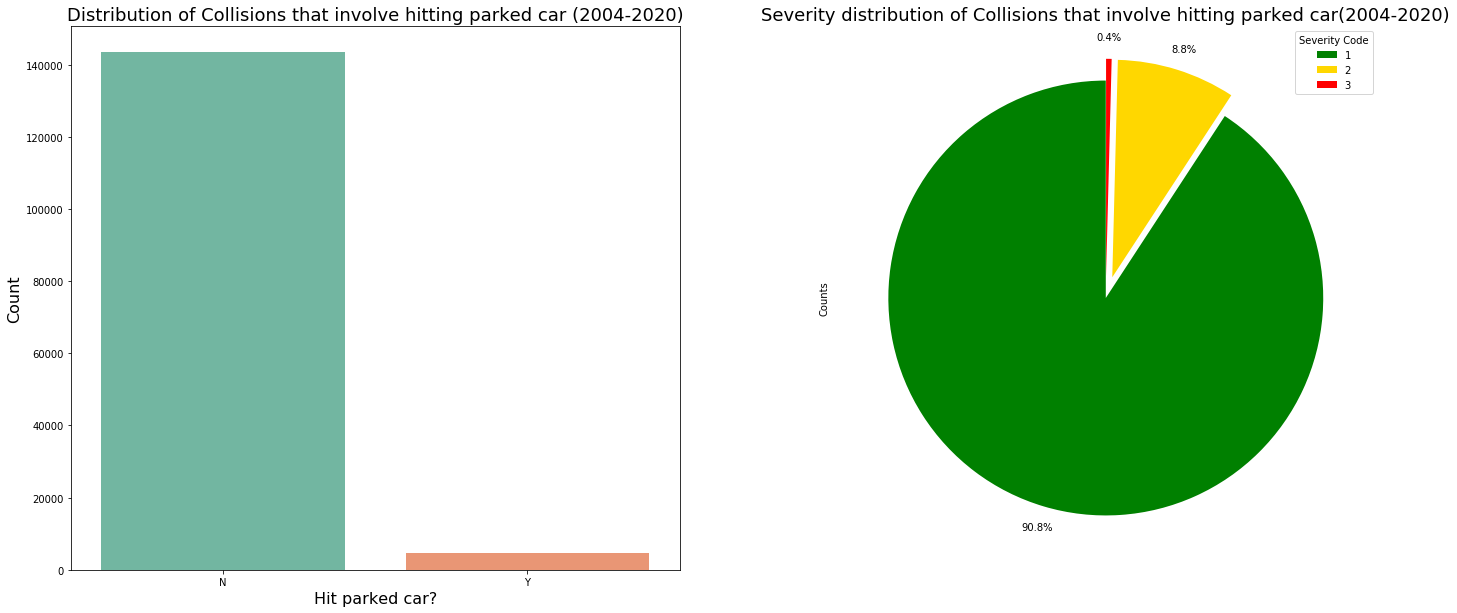

In [46]:
fig= plt.figure(figsize=(24,10))
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

sns.countplot(x ='hit_parked_car', palette='Set2', data = df, ax=ax1) 

color_list= ['green', 'gold', 'red']
explode_list=[0, 0.1, 0.1]
df[df.hit_parked_car=='Y'].groupby('severity_code').size().to_frame('Counts').Counts.plot(kind='pie', autopct= '%1.1f%%', startangle= 90, shadow= False, 
                                                                pctdistance =1.1, colors= color_list, explode=explode_list, labels=None, ax=ax2)
 
ax1.set_title('Distribution of Collisions that involve hitting parked car (2004-2020)', fontsize=18)
ax1.set_xlabel('Hit parked car?', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)

ax2.set_title('Severity distribution of Collisions that involve hitting parked car(2004-2020)', fontsize=18)
ax2.legend(title= 'Severity Code',labels= df[df.hit_parked_car=='Y'].groupby('severity_code').size().to_frame().index, loc= 'upperright')

We see that most collisions do not involve hitiing parked cars. And even amongst those that do, there are no fatalities and very few resulted in serious injuries amongst the people involved. Now let us see the correlation between the severity_code and injuries, serious_injuries and fatalities columns, as they seem to indicate the same thing superficially.   

In [47]:
df_temp= df[['severity_code','injuries', 'serious_injuries', 'fatalities' ]].groupby('severity_code', as_index= False).sum()
df_temp

,severity_code,injuries,serious_injuries,fatalities
0,1,0,0,0
1,2,66586,0,0
2,3,3493,2607,0
3,4,225,84,248


So the matrix indicates very strong correlation with severity. Let us check the correlation coefficient between severity_code and these features.

Since, apart from Severity Code = 1 ("Property Damage Only Collision"), Severity code is assigned based on the injury level, the former is a direct reflection of the latter. If we use injury features as predictors, it is easily seen that those will overwhelm the other features, and the prediction will be based on the after-effects of a collision. Therefore, these three features will be ignored.

In [48]:
df.drop(['injuries', 'serious_injuries', 'fatalities'], axis= 1, inplace=True)

In [49]:
df.columns

Index(['longitude', 'latitude', 'severity_code', 'severity_desc',
       'collision_type', 'person_count', 'ped_count', 'ped_cycle_count',
       'veh_count', 'junc_type', 'under_infl', 'weather', 'roadcond',
       'light_cond', 'speeding', 'hit_parked_car', 'Year', 'Month', 'Weekday',
       'Time'],
      dtype='object')

Superficially it appears that 'severity_code', 'collision_type', 'person_count', 'ped_count', 'ped_cycle_count', 'veh_count', 'junc_type', 'under_infl', 'weather', 'roadcond', 'light_cond', 'speeding', 'hit_parked_car' are the only columns that are relevant to the problem. The column hit_parked_car seem to have object variables 'Y' and 'N', thus replacing them with '1' and '0' respectively to make the dataset more uniform. 

In [50]:
df['hit_parked_car'].replace(to_replace={'Y':1, 'N':0 }, inplace=True)

In [51]:
df= df[[ 'severity_code', 'collision_type', 'person_count', 'ped_count', 'ped_cycle_count', 'veh_count', 'junc_type', 'under_infl', 
        'weather', 'roadcond', 'light_cond', 'speeding', 'hit_parked_car']]

In [52]:
df.dtypes

severity_code       object
collision_type      object
person_count         int64
ped_count            int64
ped_cycle_count      int64
veh_count            int64
junc_type           object
under_infl         float64
weather             object
roadcond            object
light_cond          object
speeding             int64
hit_parked_car       int64
dtype: object

The features 'collision_type', 'junc_type', 'weather', 'roadcond', 'light_cond' are object type and need to be converted into int type for modelling as they are going to be the independent variables or predictors. So, employing one-hot encoding to add dummy variables to the dataframe in their place.

In [53]:
df = pd.concat([df.drop(['junc_type', 'collision_type', 'weather', 'roadcond', 'light_cond' ], axis=1),
                 pd.get_dummies(df['weather']),
                 pd.get_dummies(df['roadcond']),
                 pd.get_dummies(df['light_cond']),
               pd.get_dummies(df['junc_type']),
               pd.get_dummies(df['collision_type'])], axis=1)
df.reset_index(drop=True, inplace=True) 

In [54]:
df.head().T

,0,1,2,3,4
severity_code,2,2,1,2,1
person_count,2,7,2,5,3
ped_count,0,1,0,0,0
ped_cycle_count,1,0,0,0,0
veh_count,1,1,2,2,2
under_infl,0,0,0,0,0
speeding,0,0,0,0,0
hit_parked_car,0,0,0,0,0
Blowing Sand/Dirt,0,0,0,0,0
Clear,1,0,0,1,1


Now let us find the correlation between our variables. Correlation is a statistical technique that can show whether and how strongly pairs of variables are interdependent. Finding the correlation among the features of the dataset helps understand the data better. For example, in the heatmap shown below, it can be observed that some features have a strong positive / negative correlation while most of them have weak / no correlation.

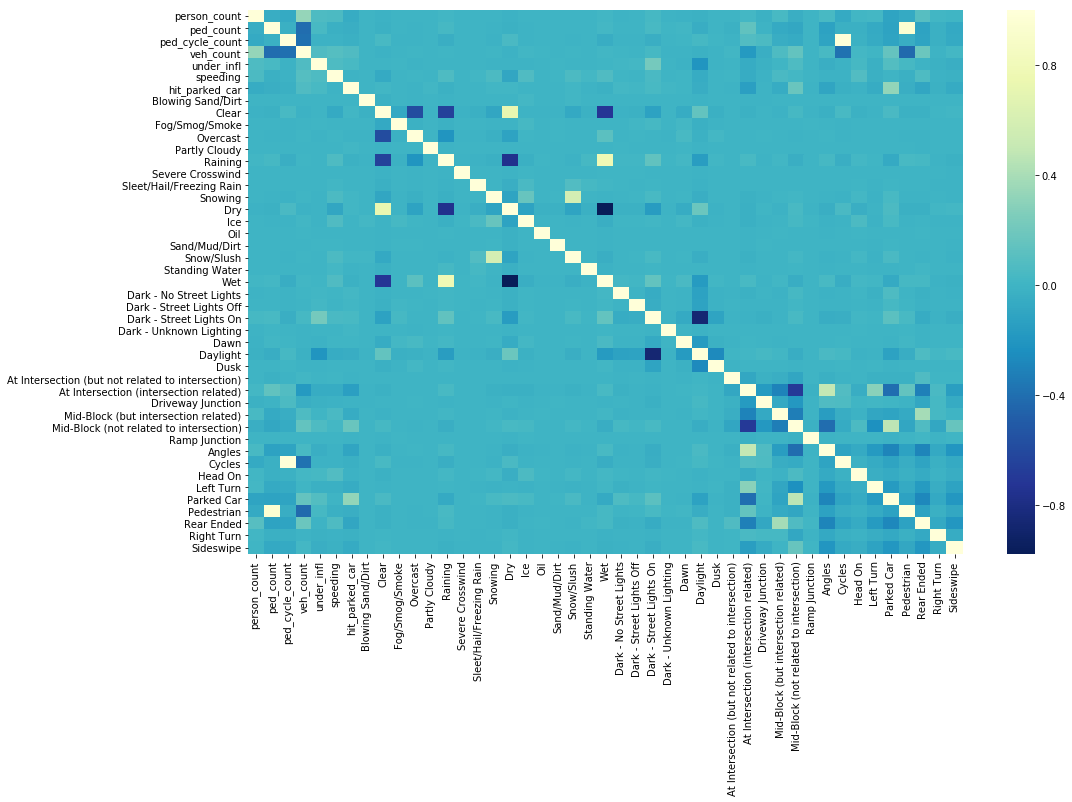

In [55]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap='YlGnBu_r')
plt.show()

We are going to take all features other than severity_code, which is our target variable, as predictors. Now before we begin modelling, let us split the dataset into train and test sets using train_test_split() after standardizing the input features.

In [56]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Setting target variable
target='severity_code'

# set X and y
y = df[target]
X = df.drop(target, axis=1)

X = StandardScaler().fit(X).transform(X)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)


### Balancing

Let us take a look at how balanced the data set is by counting and normalizing the number of instances of each class of the severity_code.

In [57]:
df['severity_code'].value_counts(normalize=True).to_frame('Counts')

,Counts
1,0.647341
2,0.334510
3,0.016528
4,0.001620


We see that the data is heavily skewed towards severity_code 1 and 2, with severity_code 3 and 4 acounting for less than even 2% of the data. This shows that there is a need to balance the data. 

**Multi-Class to binary-Class**

Often times, the skewed multi-class classification problem is converted to the two-class problem by taking the minority classes versus the addition of the rest of the classes. We first begin by turning the muli-class problem into a binary class problem by aggregating severity_code 1, 2 that represent minor or no injuries into one class and severity_code 3, 4 that represent serious cases into another class. 

In [58]:
df['severity_code'].replace(to_replace={'1':0, '2':0, '3':1, '4':1}, inplace=True)


In [59]:
df.severity_code.value_counts()

0    145424
1      2688
Name: severity_code, dtype: int64

As seen above, severity_code 1 is extremely rare, or in other words, the data is highly skewed. The main challenge of dealing with this type of data is that the machine learning algorithms train with almost 100% accuracy and fails to classify the minority class. This is intuitive since when the occurrence of the majority class is 99% per cent, even if the classifier is hard-coded to predict majority class always, the accuracy will still be 99%.  We appreciate that false negative is very costly here, that is actual severity code 4 is not predicted. The situation is just like the detection of fraudulent transactions or diagnosing diseases. There are many ways to deal with this situation by balancing the data synthetically by exploration method before training. We might

(1) under-sample the majority class

(2) over-sample the minority class or

(3) have a combination of (1) and (2), i.e. over- and under-sample simultaneously.

The combination of over- and under-sampling will be used since the data is large enough. level 1 will be randomly over-sampled to 10000 and other levels will be randomly under-sampled to 10000.

In [60]:
df = pd.concat([df[df['severity_code']==1].sample(10000, replace = True), df[df['severity_code']==0].sample(10000)], axis=0)
print('Resampled data:', df['severity_code'].value_counts())

Resampled data: 1    10000
0    10000
Name: severity_code, dtype: int64


Now the data has been balanced with both classes having the same counts. Finally we can move to the next stage i.e. Modelling. But before that, let us split the dataset again.

In [61]:
target='severity_code'

# set X and y
y = df[target]
X = df.drop(target, axis=1)

X = StandardScaler().fit(X).transform(X)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

## 6. Modelling 

In this section, we will apply four machine learning classification techniques on the data set available to train the model. These classification techniques are K-Nearest Neighbour, Decision Tree, Logistic Regression and Support Vector Machines. We will then test and compare the accuracy of these models on the test dataset using Jaccard index, F1 score and Log loss.

### K-Nearest Neighbor

Best Accuracy was with 0.761 with K=  3


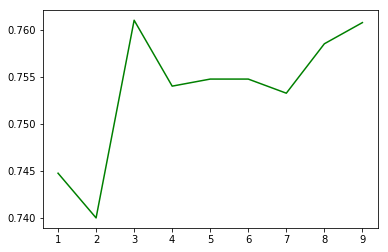

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks=10
mean_acc= np.zeros((Ks-1))

for n in range(1,Ks):
    neigh= KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat= neigh.predict(X_test)
    mean_acc[n-1]= metrics.accuracy_score(y_test, yhat)
    mean_acc

plt.plot(range(1,Ks), mean_acc, 'g')

print("Best Accuracy was with", mean_acc.max(), "with K= ", mean_acc.argmax() +1)

In [63]:
k=5
neigh_=KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh_
yhat=neigh_.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 1])

In [64]:
#Accuracy Evaluation using Jaccard Index

print("Train set accuracy:", metrics.accuracy_score(y_train, neigh_.predict(X_train)))


print("Test set accuracy:", metrics.accuracy_score(y_test, yhat))

Train set accuracy: 0.7936875
Test set accuracy: 0.75475




### Decision Tree

In [65]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as DTC
dt= DTC(min_samples_split = 5, max_features = 'log2', class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)
pdt= dt.predict(X_test)
print(pdt[0:5])
print(y_test[0:5])

[0 0 1 0 1]
30759     0
136583    0
122344    1
132843    0
21491     1
Name: severity_code, dtype: int64


In [66]:
#Evaluation 

print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_test, pdt))

Decision Tree's Accuracy:  0.78425


### Logistic Regression

In [85]:
# Logistic Regression using default setting
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(max_iter=10000, random_state=42)
LR.fit(X_train, y_train)
yhat= LR.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 1])

In [86]:
yhat_prob= LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.87557657, 0.12442343],
       [0.86605987, 0.13394013],
       [0.1135206 , 0.8864794 ],
       [0.92232072, 0.07767928],
       [0.12281697, 0.87718303]])

In [87]:
#Evaluation using Logloss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5032449012020984

In [88]:
#Grid Search
from sklearn.model_selection import GridSearchCV

LR_grid = {
           'C':        [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
           'max_iter': [1000, 10000, 100000]
          }

lr_cv = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid = LR_grid, scoring = 'accuracy', cv = 5)

lr_cv.fit(X_train, y_train)
print('Best Parameters: ', lr_cv.best_params_)

Best Parameters:  {'C': 5, 'max_iter': 1000}


In [89]:
# Logistic Regression using C=5 and max_iter=1000
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(C=5, max_iter=1000, penalty='l2')
LR.fit(X_train, y_train)
yhat= LR.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 1])

In [90]:
yhat_prob= LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.87567767, 0.12432233],
       [0.86613879, 0.13386121],
       [0.11346369, 0.88653631],
       [0.92238833, 0.07761167],
       [0.12279089, 0.87720911]])

In [91]:
#Evaluation using Logloss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5032405234579438

### SVM

In [92]:
from sklearn import svm
clf= svm.SVC(kernel= 'rbf')
clf.fit(X_train, y_train)

yhat= clf.predict(X_test)
yhat[0:5]


array([0, 0, 1, 0, 1])

In [93]:
#Evaluation using f1 score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.7670176683278558

That concludes our modelling part. Now let us move to the evaluation of these models and select the best.

## 7. Evaluation

In [97]:

from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score

In [99]:
knn_pred=neigh_.predict(X_test)
jc1=jaccard_score(y_test, knn_pred)
fs1=f1_score(y_test, knn_pred, average='weighted')

tree_pred=dt.predict(X_test)
jc2=jaccard_score(y_test, tree_pred)
fs2=f1_score(y_test, tree_pred, average='weighted')

svm_pred=clf.predict(X_test)
jc3=jaccard_score(y_test, svm_pred)
fs3=f1_score(y_test, svm_pred, average='weighted')

log_pred=LR.predict(X_test)
proba=LR.predict_proba(X_test)
jc4=jaccard_score(y_test, log_pred)
fs4=f1_score(y_test, log_pred, average='weighted')  
ll4=log_loss(y_test, proba)

list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll = ['NA', 'NA', 'NA', ll4]


import pandas as pd

# fomulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.613170,0.754623,NA
Decision Tree,0.641760,0.784223,NA
SVM,0.608256,0.767018,NA
Logistic Regression,0.600420,0.761707,0.503241


## 8. Conclusion

We can conclude that the Decision Tree is the best model in this scenario an KNN is the second best. While Logistic Regression appears to be the worst of the four techniques. The initial data had a lot of missing values and was unbalanced, so we had to ensure proper cleaning and balancing of the data in order to prevent a skewed model. 
From the exploratory analysis, we see that most accidents cause only property damage or minor injuries.Most accidents are angled crashes followed by parked car and rear end crashes. We also see that most accidents happen during clear days on dry roads in daylight. Most property damage only collisions occur at midblocks while most injury collisions happen at intersections. And most serious injuries and fatalities are caused by collisions with pedestrians. As such special attantion should be paid towards pedestrian safety. Further, we find that most property damage only collisions occur at midblocks while most injury collisions happen at intersections. Finally, influence of alcohol/drugs and speeding appear to increase the severity of accidents.

                                *********************************************************************